<a href="https://colab.research.google.com/github/GabrielWalak/Eksploracja-danych/blob/main/zadanie_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Wymiary zbioru: (891, 15)
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

--- 1.1 Podstawowe statystyki ---
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
me

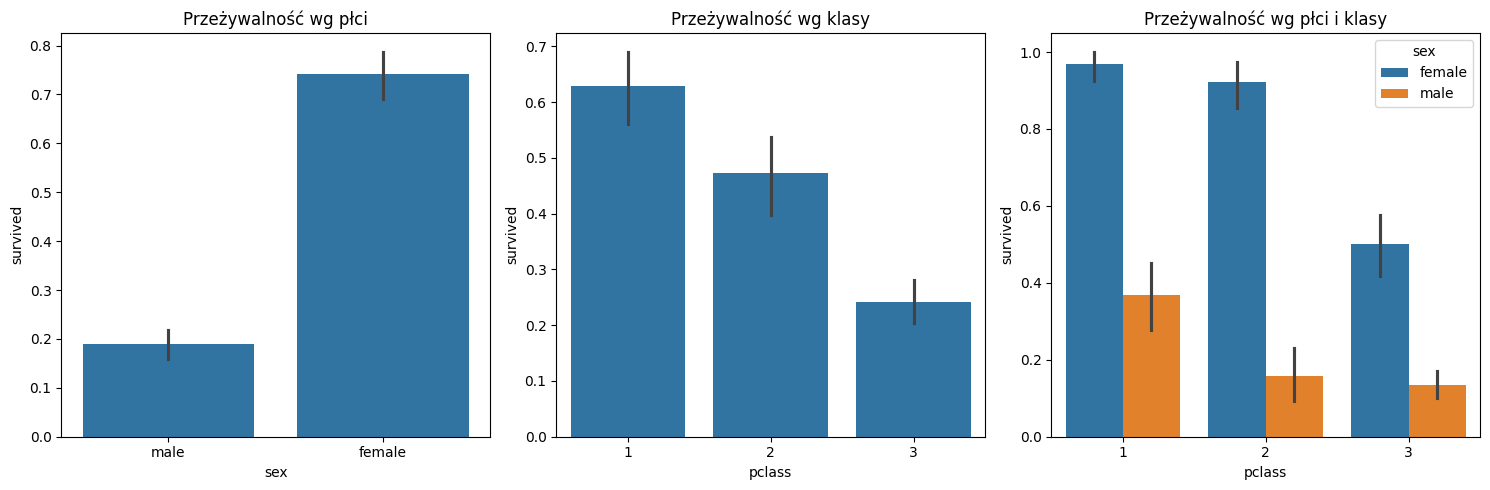


--- 2.1 Usunięcie kolumn ---
Usunięte: ['deck', 'embark_town', 'alive', 'class', 'who', 'adult_male']

--- 2.2 Uzupełnienie braków ---
Age uzupełnione medianą: 28.0
Embarked uzupełnione modą: S

--- 2.3 One-hot encoding ---
Kolumny po enkodowaniu: ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'alone', 'sex_male', 'embarked_Q', 'embarked_S']

--- 2.4 Podział train/test (80/20, stratify) ---
Train: 712, Test: 179
Proporcje train: {0: 0.617, 1: 0.383}
Proporcje test: {0: 0.615, 1: 0.385}

CZĘŚĆ 3: BUDOWA MODELU

--- 3. 1 Trenowanie modelu ---
Model wytrenowany

--- 3.2 Współczynniki modelu ---
   Zmienna  Współczynnik (β)      |β|
  sex_male         -2.490658 2.490658
    pclass         -1.050741 1.050741
     alone         -0.599158 0.599158
     sibsp         -0.398473 0.398473
embarked_Q          0.354502 0.354502
embarked_S         -0.319949 0.319949
     parch         -0.197409 0.197409
       age         -0.037380 0.037380
      fare          0.001913 0.001913

Intercept:

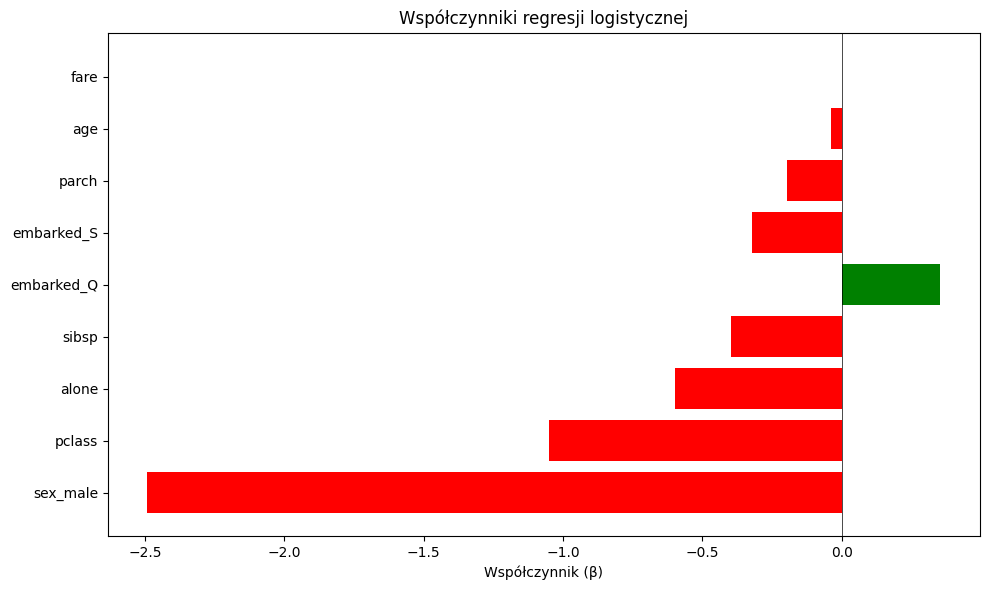


--- 4.1 Predykcja ---
Rozkład predykcji: {0: 119, 1: 60}

--- 4. 2 Macierz konfuzji ---
TN=97, FP=13, FN=22, TP=47


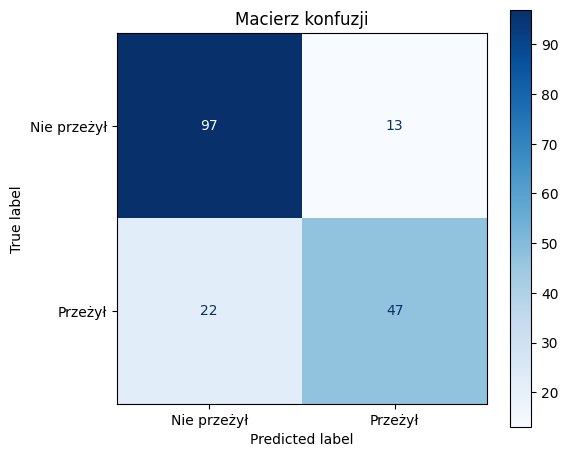


--- 4.3 Metryki ewaluacji ---
Accuracy:    0.8045 - procent poprawnych klasyfikacji
Precision:   0.7833 - z przewidzianych 'przeżył', ile faktycznie przeżyło
Recall:      0.6812 - z rzeczywiście przeżyłych, ile wykryto
F1-score:    0.7287 - średnia harmoniczna Precision i Recall
Specificity: 0.8818 - z rzeczywiście zmarłych, ile wykryto

--- 4.4 Krzywa ROC i AUC ---
AUC: 0.8514


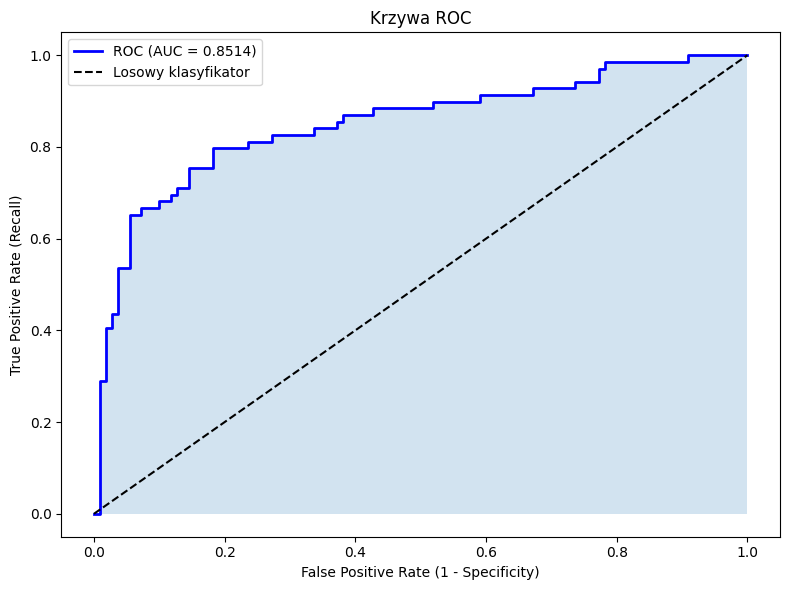


--- 4. 5 Najważniejsza metryka ---

RECALL jest najważniejszą metryką w tym problemie:
• Chcemy minimalizować False Negatives (pominięcie ocalałych)
• W kontekście ratunkowym: lepiej błędnie zakwalifikować kogoś jako ocalałego
  niż pominąć osobę, która faktycznie przeżyła
• Alternatywnie F1-score jako kompromis między Precision a Recall


--- 5.1 Progi klasyfikacji ---
 Próg  Precision   Recall       F1  Accuracy
  0.3   0.666667 0.811594 0.732026  0.770950
  0.4   0.722222 0.753623 0.737589  0.793296
  0.5   0.783333 0.681159 0.728682  0.804469
  0.6   0.877551 0.623188 0.728814  0.821229
  0.7   0.894737 0.492754 0.635514  0.782123

Wniosek: Niższy próg → wyższy Recall, niższa Precision


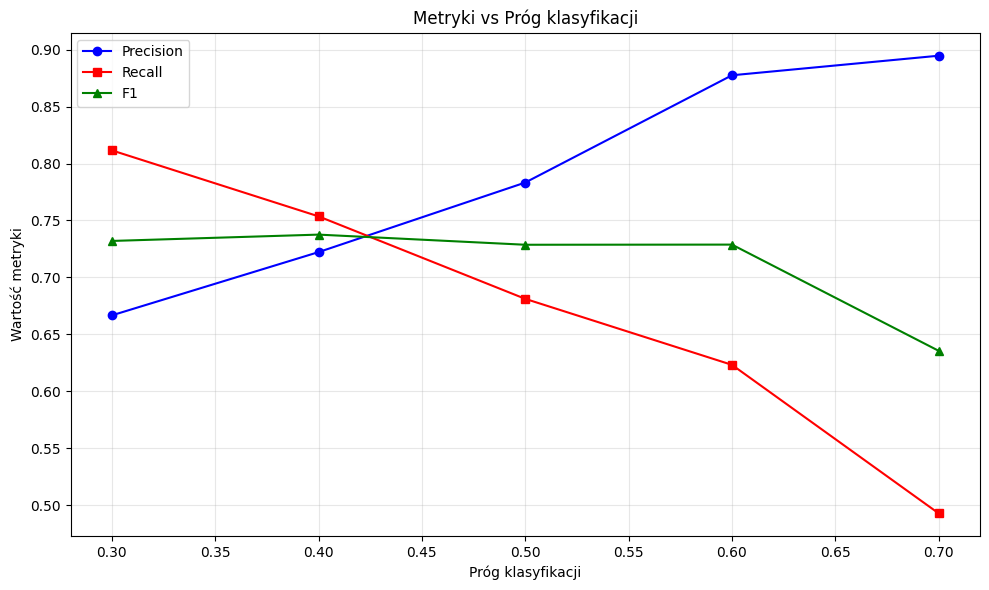


--- 5.2 Model balanced ---
Metryka      Bazowy     Balanced   Różnica
---------------------------------------------
Accuracy     0.8045     0.7989     -0.0056
Precision    0.7833     0.7260     -0.0573
Recall       0.6812     0.7681     +0.0870
F1           0.7287     0.7465     +0.0178
AUC          0.8514     0.8513    

--- 6.1 Standaryzacja ---
Standaryzacja wykonana (fit tylko na train)
Średnia po standaryzacji: 0.0000
Std po standaryzacji: 1.0000

--- 6.2 Wpływ parametru C ---
C=0.001  AUC=0.8148, Suma|β|=0.48
C=0.01   AUC=0.8372, Suma|β|=1.83
C=0.1    AUC=0.8480, Suma|β|=3.34
C=1      AUC=0.8499, Suma|β|=3.86
C=10     AUC=0.8506, Suma|β|=3.93
C=100    AUC=0.8505, Suma|β|=3.93


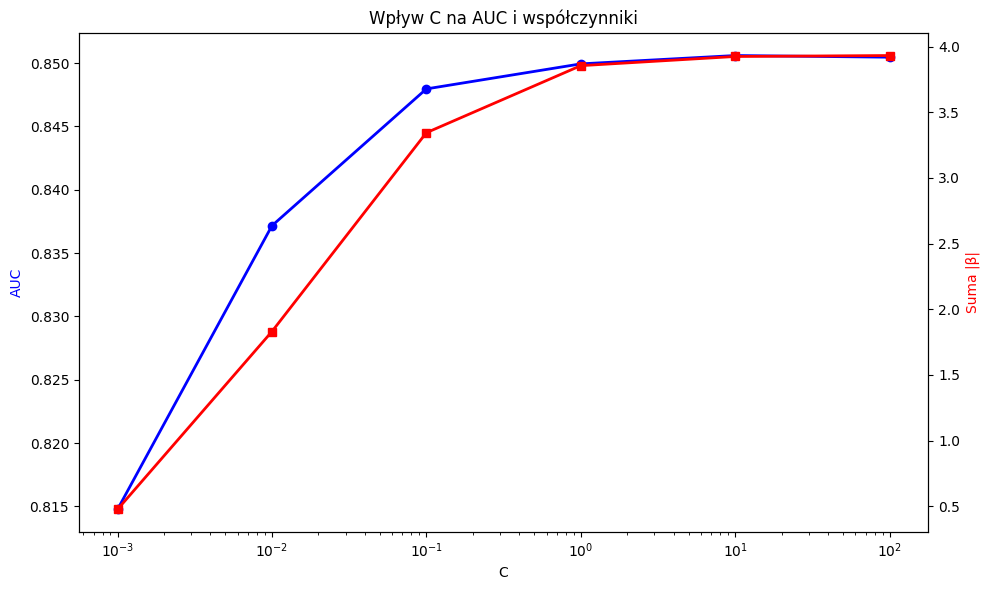


Interpretacja: Małe C → silna regularyzacja, Duże C → słaba regularyzacja

--- 6.3 L1 vs L2 (C=0.1) ---
   Zmienna  L2 (Ridge)  L1 (Lasso)
    pclass   -0.755039   -0.775946
       age   -0.397346   -0.313927
     sibsp   -0.336530   -0.118713
     parch   -0.139104    0.000000
      fare    0.124516    0.011081
     alone   -0.250661   -0.003334
  sex_male   -1.111038   -1.128147
embarked_Q    0.081365    0.000000
embarked_S   -0.148801   -0.152507

AUC L2: 0.8480, AUC L1: 0.8461
Wyzerowane przez L1: 2
L1 może zerować współczynniki (selekcja cech), L2 tylko zmniejsza


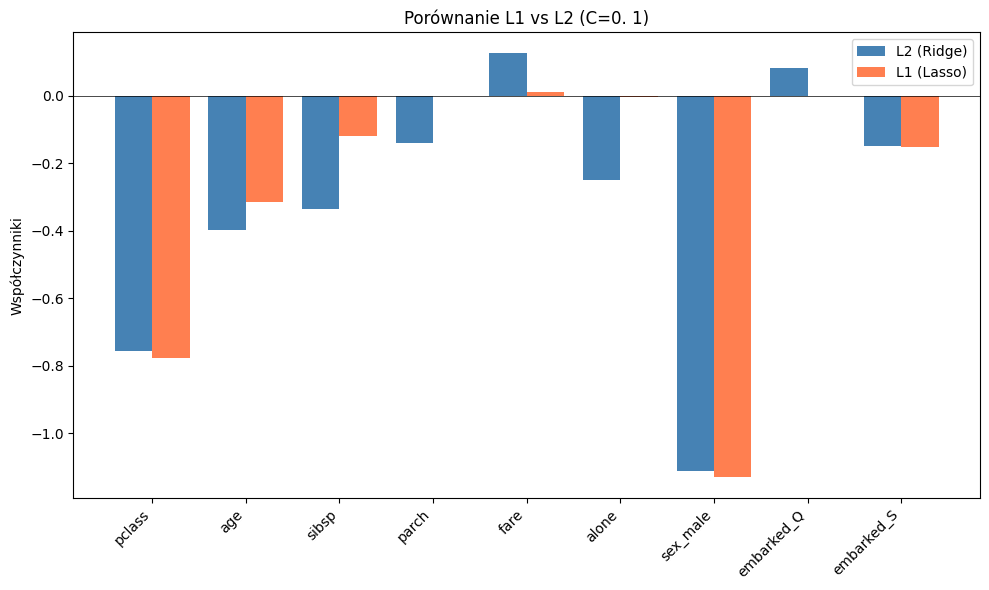

In [2]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn. model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                             recall_score, f1_score, roc_curve, roc_auc_score,
                             ConfusionMatrixDisplay)

df = sns.load_dataset('titanic')
print(f"Wymiary zbioru: {df.shape}")
print(df.head())

# 1.1 Podstawowe statystyki
print("\n--- 1.1 Podstawowe statystyki ---")
print(df.describe())
print(df.info())

# 1.2 Brakujące wartości
print("\n--- 1.2 Brakujące wartości ---")
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({'Brakujące': missing, 'Procent (%)': missing_pct})
print(missing_df[missing_df['Brakujące'] > 0].sort_values('Brakujące', ascending=False))

# 1.3 Proporcje przeżywalności
print("\n--- 1.3 Proporcje przeżywalności ---")
print(f"Ogólna przeżywalność: {df['survived'].mean():.2%}")
print("\nWg płci:")
print(df. groupby('sex')['survived'].agg(['mean', 'count']))
print("\nWg klasy:")
print(df.groupby('pclass')['survived']. agg(['mean', 'count']))
print("\nWg płci i klasy:")
print(df. pivot_table(values='survived', index='sex', columns='pclass', aggfunc='mean'). round(3))

# 1.4 Wykres przeżywalności
fig, axes = plt. subplots(1, 3, figsize=(15, 5))
sns.barplot(data=df, x='sex', y='survived', ax=axes[0])
axes[0]. set_title('Przeżywalność wg płci')
sns.barplot(data=df, x='pclass', y='survived', ax=axes[1])
axes[1].set_title('Przeżywalność wg klasy')
sns.barplot(data=df, x='pclass', y='survived', hue='sex', ax=axes[2])
axes[2]. set_title('Przeżywalność wg płci i klasy')
plt.tight_layout()
plt.savefig('01_survival_analysis.png', dpi=150)
plt.show()

# 2.1 Usunięcie nieprzydatnych kolumn
print("\n--- 2.1 Usunięcie kolumn ---")
cols_to_drop = ['deck', 'embark_town', 'alive', 'class', 'who', 'adult_male']
df_clean = df.drop(columns=cols_to_drop)
print(f"Usunięte: {cols_to_drop}")

# 2.2 Uzupełnienie brakujących wartości
print("\n--- 2.2 Uzupełnienie braków ---")
median_age = df_clean['age'].median()
df_clean['age'] = df_clean['age'].fillna(median_age)
print(f"Age uzupełnione medianą: {median_age}")

mode_embarked = df_clean['embarked'].mode()[0]
df_clean['embarked'] = df_clean['embarked'].fillna(mode_embarked)
print(f"Embarked uzupełnione modą: {mode_embarked}")

# 2.3 One-hot encoding
print("\n--- 2.3 One-hot encoding ---")
df_encoded = pd. get_dummies(df_clean, columns=['sex', 'embarked'], drop_first=True)
print(f"Kolumny po enkodowaniu: {list(df_encoded. columns)}")

# 2.4 Podział na zbiory
print("\n--- 2.4 Podział train/test (80/20, stratify) ---")
X = df_encoded. drop('survived', axis=1)
y = df_encoded['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Train: {X_train.shape[0]}, Test: {X_test.shape[0]}")
print(f"Proporcje train: {y_train.value_counts(normalize=True). round(3). to_dict()}")
print(f"Proporcje test: {y_test. value_counts(normalize=True).round(3).to_dict()}")

print("\n" + "="*60)
print("CZĘŚĆ 3: BUDOWA MODELU")
print("="*60)

# 3.1 Trenowanie modelu
print("\n--- 3. 1 Trenowanie modelu ---")
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
print("Model wytrenowany")

# 3. 2 Współczynniki i interpretacja
print("\n--- 3.2 Współczynniki modelu ---")
coef_df = pd.DataFrame({
    'Zmienna': X. columns,
    'Współczynnik (β)': model. coef_[0],
    '|β|': np.abs(model. coef_[0])
}). sort_values('|β|', ascending=False)
print(coef_df.to_string(index=False))
print(f"\nIntercept: {model. intercept_[0]:.4f}")

print("\n--- Interpretacja 3 najważniejszych zmiennych ---")
for _, row in coef_df.head(3).iterrows():
    var, coef = row['Zmienna'], row['Współczynnik (β)']
    direction = "zwiększa" if coef > 0 else "zmniejsza"
    print(f"• {var}: β={coef:.4f} → {direction} log-odds przeżycia o {abs(coef):.2f}")

# 3.3 Odds Ratio
print("\n--- 3.3 Odds Ratio ---")
coef_df['Odds Ratio'] = np.exp(coef_df['Współczynnik (β)'])
print(coef_df[['Zmienna', 'Współczynnik (β)', 'Odds Ratio']].to_string(index=False))

sex_or = np.exp(coef_df[coef_df['Zmienna'] == 'sex_male']['Współczynnik (β)']. values[0])
print(f"\nInterpretacja sex_male (OR={sex_or:.4f}):")
print(f"• Mężczyźni mieli o {(1-sex_or):.2%} mniejsze szanse przeżycia niż kobiety")

# Wizualizacja współczynników
plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in coef_df['Współczynnik (β)']]
plt.barh(coef_df['Zmienna'], coef_df['Współczynnik (β)'], color=colors)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('Współczynnik (β)')
plt.title('Współczynniki regresji logistycznej')
plt.tight_layout()
plt.savefig('02_coefficients.png', dpi=150)
plt.show()

# 4.1 Predykcja
print("\n--- 4.1 Predykcja ---")
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
print(f"Rozkład predykcji: {pd.Series(y_pred).value_counts().to_dict()}")

# 4.2 Macierz konfuzji
print("\n--- 4. 2 Macierz konfuzji ---")
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
print(f"TN={TN}, FP={FP}, FN={FN}, TP={TP}")

fig, ax = plt. subplots(figsize=(6, 5))
ConfusionMatrixDisplay(cm, display_labels=['Nie przeżył', 'Przeżył']). plot(ax=ax, cmap='Blues')
plt.title('Macierz konfuzji')
plt.tight_layout()
plt. savefig('03_confusion_matrix.png', dpi=150)
plt. show()

# 4.3 Metryki
print("\n--- 4.3 Metryki ewaluacji ---")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
specificity = TN / (TN + FP)

print(f"Accuracy:    {accuracy:.4f} - procent poprawnych klasyfikacji")
print(f"Precision:   {precision:.4f} - z przewidzianych 'przeżył', ile faktycznie przeżyło")
print(f"Recall:      {recall:.4f} - z rzeczywiście przeżyłych, ile wykryto")
print(f"F1-score:    {f1:.4f} - średnia harmoniczna Precision i Recall")
print(f"Specificity: {specificity:.4f} - z rzeczywiście zmarłych, ile wykryto")

# 4.4 Krzywa ROC i AUC
print("\n--- 4.4 Krzywa ROC i AUC ---")
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
print(f"AUC: {auc:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, 'b-', lw=2, label=f'ROC (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Losowy klasyfikator')
plt. fill_between(fpr, tpr, alpha=0.2)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt. ylabel('True Positive Rate (Recall)')
plt.title('Krzywa ROC')
plt.legend()
plt.tight_layout()
plt.savefig('04_roc_curve.png', dpi=150)
plt.show()

# 4.5 Najważniejsza metryka
print("\n--- 4. 5 Najważniejsza metryka ---")
print("""
RECALL jest najważniejszą metryką w tym problemie:
• Chcemy minimalizować False Negatives (pominięcie ocalałych)
• W kontekście ratunkowym: lepiej błędnie zakwalifikować kogoś jako ocalałego
  niż pominąć osobę, która faktycznie przeżyła
• Alternatywnie F1-score jako kompromis między Precision a Recall
""")

# 5. 1 Różne progi klasyfikacji
print("\n--- 5.1 Progi klasyfikacji ---")
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
results = []
for t in thresholds:
    y_t = (y_proba >= t).astype(int)
    results.append({
        'Próg': t,
        'Precision': precision_score(y_test, y_t, zero_division=0),
        'Recall': recall_score(y_test, y_t),
        'F1': f1_score(y_test, y_t),
        'Accuracy': accuracy_score(y_test, y_t)
    })
results_df = pd. DataFrame(results)
print(results_df.to_string(index=False))
print("\nWniosek: Niższy próg → wyższy Recall, niższa Precision")

# Wizualizacja progów
plt.figure(figsize=(10, 6))
plt.plot(thresholds, results_df['Precision'], 'b-o', label='Precision')
plt.plot(thresholds, results_df['Recall'], 'r-s', label='Recall')
plt. plot(thresholds, results_df['F1'], 'g-^', label='F1')
plt.xlabel('Próg klasyfikacji')
plt. ylabel('Wartość metryki')
plt.title('Metryki vs Próg klasyfikacji')
plt. legend()
plt. grid(alpha=0.3)
plt.tight_layout()
plt. savefig('05_threshold_analysis.png', dpi=150)
plt.show()

# 5.2 Model z class_weight='balanced'
print("\n--- 5.2 Model balanced ---")
model_bal = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
model_bal.fit(X_train, y_train)
y_pred_bal = model_bal.predict(X_test)
y_proba_bal = model_bal. predict_proba(X_test)[:, 1]

print(f"{'Metryka':<12} {'Bazowy':<10} {'Balanced':<10} {'Różnica'}")
print("-" * 45)
for name, func in [('Accuracy', accuracy_score), ('Precision', precision_score),
                   ('Recall', recall_score), ('F1', f1_score)]:
    base = func(y_test, y_pred)
    bal = func(y_test, y_pred_bal)
    print(f"{name:<12} {base:<10.4f} {bal:<10.4f} {bal-base:+.4f}")
print(f"{'AUC':<12} {roc_auc_score(y_test, y_proba):<10.4f} {roc_auc_score(y_test, y_proba_bal):<10.4f}")


# 6.1 Standaryzacja
print("\n--- 6.1 Standaryzacja ---")
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)  # fit tylko na train!
X_test_sc = scaler. transform(X_test)
print("Standaryzacja wykonana (fit tylko na train)")
print(f"Średnia po standaryzacji: {X_train_sc. mean():.4f}")
print(f"Std po standaryzacji: {X_train_sc.std():.4f}")

# 6.2 Wpływ parametru C
print("\n--- 6.2 Wpływ parametru C ---")
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
c_results = []
for C in C_values:
    m = LogisticRegression(max_iter=1000, C=C, penalty='l2', random_state=42)
    m.fit(X_train_sc, y_train)
    auc_c = roc_auc_score(y_test, m.predict_proba(X_test_sc)[:, 1])
    sum_coef = np.abs(m.coef_). sum()
    c_results.append({'C': C, 'AUC': auc_c, 'Suma |β|': sum_coef})
    print(f"C={C:<6} AUC={auc_c:.4f}, Suma|β|={sum_coef:.2f}")

c_df = pd.DataFrame(c_results)

# Wizualizacja C
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.semilogx(c_df['C'], c_df['AUC'], 'b-o', lw=2)
ax1.set_xlabel('C')
ax1.set_ylabel('AUC', color='blue')
ax2 = ax1. twinx()
ax2.semilogx(c_df['C'], c_df['Suma |β|'], 'r-s', lw=2)
ax2.set_ylabel('Suma |β|', color='red')
plt.title('Wpływ C na AUC i współczynniki')
plt.tight_layout()
plt.savefig('06_regularization_C.png', dpi=150)
plt.show()

print("\nInterpretacja: Małe C → silna regularyzacja, Duże C → słaba regularyzacja")

# 6.3 Porównanie L1 vs L2
print("\n--- 6.3 L1 vs L2 (C=0.1) ---")
model_l2 = LogisticRegression(max_iter=1000, C=0.1, penalty='l2', random_state=42)
model_l1 = LogisticRegression(max_iter=1000, C=0.1, penalty='l1', solver='liblinear', random_state=42)
model_l2.fit(X_train_sc, y_train)
model_l1. fit(X_train_sc, y_train)

comp = pd.DataFrame({
    'Zmienna': X.columns,
    'L2 (Ridge)': model_l2.coef_[0],
    'L1 (Lasso)': model_l1. coef_[0]
})
print(comp.to_string(index=False))

auc_l2 = roc_auc_score(y_test, model_l2.predict_proba(X_test_sc)[:, 1])
auc_l1 = roc_auc_score(y_test, model_l1.predict_proba(X_test_sc)[:, 1])
l1_zeros = (np.abs(model_l1.coef_[0]) < 0.001).sum()

print(f"\nAUC L2: {auc_l2:.4f}, AUC L1: {auc_l1:.4f}")
print(f"Wyzerowane przez L1: {l1_zeros}")
print("L1 może zerować współczynniki (selekcja cech), L2 tylko zmniejsza")

# Wizualizacja L1 vs L2
x = np.arange(len(X. columns))
plt. figure(figsize=(10, 6))
plt.bar(x - 0.2, comp['L2 (Ridge)'], 0.4, label='L2 (Ridge)', color='steelblue')
plt.bar(x + 0.2, comp['L1 (Lasso)'], 0.4, label='L1 (Lasso)', color='coral')
plt. xticks(x, X.columns, rotation=45, ha='right')
plt. axhline(0, color='black', linewidth=0.5)
plt.ylabel('Współczynniki')
plt.title('Porównanie L1 vs L2 (C=0. 1)')
plt. legend()
plt. tight_layout()
plt.savefig('07_l1_vs_l2.png', dpi=150)
plt.show()